In [ ]:
!pip3 install gensim

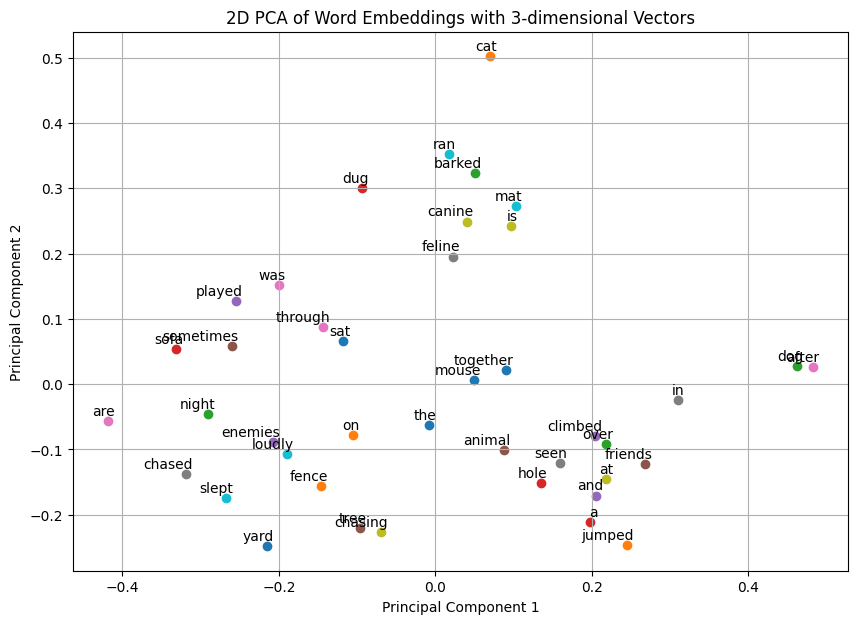

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec

# Update sentences to create a larger dataset
extended_sentences = [
    ['the', 'cat', 'sat', 'on', 'the', 'mat'],
    ['the', 'dog', 'barked', 'at', 'the', 'cat'],
    ['the', 'dog', 'chased', 'the', 'cat'],
    ['the', 'cat', 'climbed', 'the', 'tree'],
    ['the', 'dog', 'ran', 'through', 'the', 'yard'],
    ['the', 'dog', 'and', 'the', 'cat', 'are', 'friends'],
    ['a', 'cat', 'was', 'seen', 'chasing', 'a', 'mouse'],
    ['a', 'dog', 'barked', 'loudly', 'in', 'the', 'night'],
    ['the', 'cat', 'jumped', 'over', 'the', 'fence'],
    ['the', 'dog', 'dug', 'a', 'hole', 'in', 'the', 'yard'],
    ['the', 'cat', 'and', 'the', 'dog', 'played', 'together'],
    ['a', 'cat', 'is', 'a', 'feline', 'animal'],
    ['a', 'dog', 'is', 'a', 'canine', 'animal'],
    ['the', 'dog', 'ran', 'after', 'the', 'cat'],
    ['the', 'cat', 'slept', 'on', 'the', 'sofa'],
    ['the', 'dog', 'and', 'the', 'cat', 'are', 'enemies', 'sometimes']
]

# Train Word2Vec model with 3-dimensional vectors
model_3d = Word2Vec(extended_sentences, vector_size=3, window=2, min_count=1, sg=1)  # Skip-gram model

# Get word vectors
words = list(model_3d.wv.index_to_key)
word_vectors = [model_3d.wv[word] for word in words]

# Perform PCA to reduce dimensions to 2D for visualization
pca_3d = PCA(n_components=2)
word_vectors_2d = pca_3d.fit_transform(word_vectors)

# Plot word vectors
plt.figure(figsize=(10, 7))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.title('2D PCA of Word Embeddings with 3-dimensional Vectors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


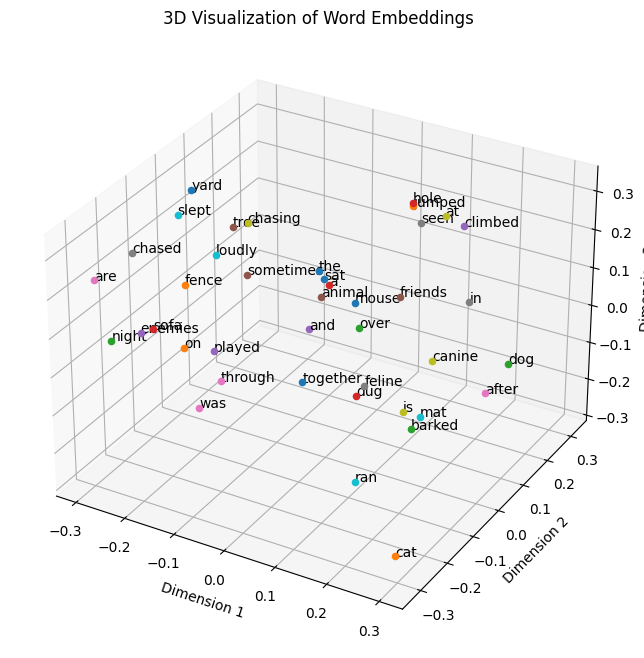

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Extract 3-dimensional word vectors
word_vectors_3d = np.array([model_3d.wv[word] for word in words])

# Plot word vectors in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i, word in enumerate(words):
    ax.scatter(word_vectors_3d[i, 0], word_vectors_3d[i, 1], word_vectors_3d[i, 2])
    ax.text(word_vectors_3d[i, 0], word_vectors_3d[i, 1], word_vectors_3d[i, 2], word)

ax.set_title('3D Visualization of Word Embeddings')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

plt.show()


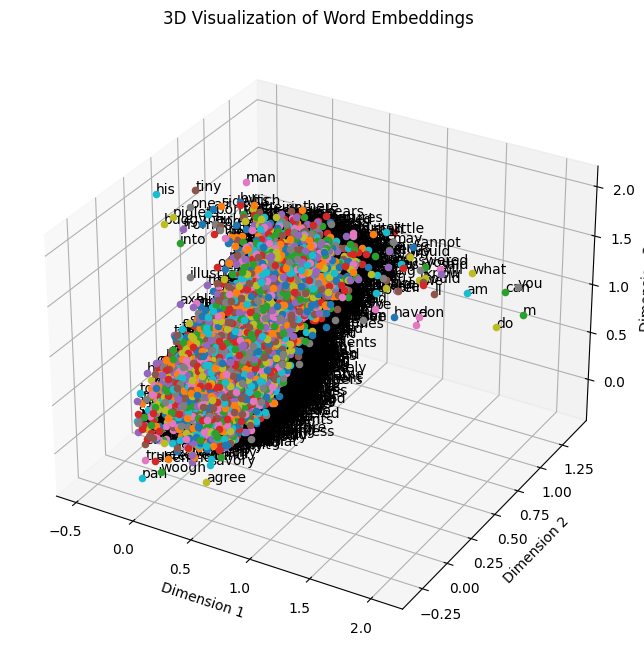

In [ ]:
import re
from gensim.models import Word2Vec
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Function to read and preprocess text file
def read_and_preprocess(filename):
    with open(filename, 'r') as file:
        text = file.read().lower()
        # Simple sentence splitting based on periods
        sentences = re.split(r'[.!?]', text)
        # Tokenize sentences into words
        sentences = [re.findall(r'\b\w+\b', sentence) for sentence in sentences if sentence]
    return sentences

# Read and preprocess the corpus
filename = 'wizard_of_oz.txt'
sentences = read_and_preprocess(filename)

# Train Word2Vec model with 3-dimensional vectors
model_3d = Word2Vec(sentences, vector_size=3, window=5, min_count=1, sg=1)  # Skip-gram model

# Extract words and their vectors
words = list(model_3d.wv.index_to_key)
word_vectors_3d = np.array([model_3d.wv[word] for word in words])

# Plot word vectors in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for i, word in enumerate(words):
    ax.scatter(word_vectors_3d[i, 0], word_vectors_3d[i, 1], word_vectors_3d[i, 2])
    ax.text(word_vectors_3d[i, 0], word_vectors_3d[i, 1], word_vectors_3d[i, 2], word)

ax.set_title('3D Visualization of Word Embeddings')
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

plt.show()


In [ ]:
import re
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Function to read and preprocess text file
def read_and_preprocess(filename):
    with open(filename, 'r') as file:
        text = file.read().lower()
        # Simple sentence splitting based on periods
        sentences = re.split(r'[.!?]', text)
        # Tokenize sentences into words
        sentences = [re.findall(r'\b\w+\b', sentence) for sentence in sentences if sentence]
    return sentences

# Read and preprocess the corpus
filename = 'wizard_of_oz.txt'  # Update this path if needed
sentences = read_and_preprocess(filename)

# Train Word2Vec model with 3-dimensional vectors
model_3d = Word2Vec(sentences, vector_size=10, window=5, min_count=1, sg=1)  # Skip-gram model

# Extract words and their vectors
words = list(model_3d.wv.index_to_key)
word_vectors_3d = np.array([model_3d.wv[word] for word in words])

# Perform PCA to reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors_3d)

# Plot word vectors in 2D
plt.figure(figsize=(100, 50))
for i, word in enumerate(words):
    plt.scatter(word_vectors_2d[i, 0], word_vectors_2d[i, 1])
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.title('2D PCA of Word Embeddings')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

class NNLM(nn.Module):
    def __init__(self, vocab_size, embed_size, context_size, hidden_size):
        super(NNLM, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embed_size)
        self.linear1 = nn.Linear(context_size * embed_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view(1, -1)
        out = torch.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = torch.log_softmax(out, dim=1)
        return log_probs

# Parameters
vocab_size = 5000  # Example vocabulary size
embed_size = 128   # Embedding dimension
context_size = 3   # Context window size
hidden_size = 128  # Hidden layer size

# Initialize the model, loss function, and optimizer
model = NNLM(vocab_size, embed_size, context_size, hidden_size)
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Example input (context words as indices)
context_words = torch.tensor([1, 2, 3], dtype=torch.long)

# Forward pass
log_probs = model(context_words)

# Calculate loss (example target word index)
target_word = torch.tensor([4], dtype=torch.long)
loss = loss_function(log_probs, target_word)

# Backward pass and optimization
loss.backward()
optimizer.step()

print("Loss:", loss.item())


Loss: 8.698484420776367


# FFNN for NLP

In [29]:
import re
import numpy as np
from collections import Counter
from torch.utils.data import Dataset, DataLoader

# Load the text file
file_path = './wizard_of_oz.txt'
with open(file_path, 'r') as file:
    text = file.read()

# Preprocess the text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.split()
    return text

tokens = preprocess_text(text)
vocab = Counter(tokens)
vocab_size = len(vocab)
word_to_idx = {word: i for i, (word, _) in enumerate(vocab.items())}
idx_to_word = {i: word for word, i in word_to_idx.items()}

# Display some tokenized words
tokens[:10], list(vocab.items())[:10]

(['dorothy', 'and', 'the', 'wizard', 'in', 'oz', 'by', 'l', 'frank', 'baum'],
 [('dorothy', 240),
  ('and', 1533),
  ('the', 3178),
  ('wizard', 260),
  ('in', 636),
  ('oz', 66),
  ('by', 112),
  ('l', 3),
  ('frank', 4),
  ('baum', 4)])

In [30]:
sequence_length = 3  # Context window size

class TextDataset(Dataset):
    def __init__(self, tokens, word_to_idx, sequence_length):
        self.tokens = tokens
        self.word_to_idx = word_to_idx
        self.sequence_length = sequence_length
        self.data = self.create_sequences(tokens, sequence_length)

    def create_sequences(self, tokens, sequence_length):
        sequences = []
        for i in range(len(tokens) - sequence_length):
            seq = tokens[i:i + sequence_length + 1]
            sequences.append([self.word_to_idx[word] for word in seq])
        return sequences

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        seq = self.data[idx]
        return torch.tensor(seq[:-1]), torch.tensor(seq[-1])

dataset = TextDataset(tokens, word_to_idx, sequence_length)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [31]:
class NNLM(nn.Module):
    def __init__(self, vocab_size, embed_size, context_size, hidden_size):
        super(NNLM, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embed_size)
        self.linear1 = nn.Linear(context_size * embed_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs).view(-1, context_size * embed_size)
        out = torch.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = torch.log_softmax(out, dim=1)
        return log_probs

In [32]:
# Reinitialize the model with corrected architecture
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NNLM(vocab_size, embed_size, context_size, hidden_size).to(device)

# Training the model
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
num_epochs = 100  # Training for 2 epochs for demonstration

for epoch in range(num_epochs):
    total_loss = 0
    for context, target in dataloader:
        context = context.to(device)
        target = target.to(device)
        model.zero_grad()
        log_probs = model(context)
        loss = loss_function(log_probs, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {total_loss / len(dataloader)}')

Epoch 1, Loss: 8.093180730961523
Epoch 2, Loss: 7.524670129118993
Epoch 3, Loss: 7.149840491675462
Epoch 4, Loss: 6.884121707430016
Epoch 5, Loss: 6.686870352813072
Epoch 6, Loss: 6.540858953241513
Epoch 7, Loss: 6.428750021504705
Epoch 8, Loss: 6.339321396238706
Epoch 9, Loss: 6.266091762797424
Epoch 10, Loss: 6.204950972283556
Epoch 11, Loss: 6.152458724917699
Epoch 12, Loss: 6.106700468859289
Epoch 13, Loss: 6.066211803910946
Epoch 14, Loss: 6.029470291774443
Epoch 15, Loss: 5.995993931123447
Epoch 16, Loss: 5.964792321773871
Epoch 17, Loss: 5.9355258594333495
Epoch 18, Loss: 5.9080451240308
Epoch 19, Loss: 5.882053083642662
Epoch 20, Loss: 5.857359747966251
Epoch 21, Loss: 5.833650377704811
Epoch 22, Loss: 5.8109253693784675
Epoch 23, Loss: 5.789194337153109
Epoch 24, Loss: 5.768126269211718
Epoch 25, Loss: 5.747874174566659
Epoch 26, Loss: 5.728340841388847
Epoch 27, Loss: 5.709239266530155
Epoch 28, Loss: 5.690673021336789
Epoch 29, Loss: 5.67284905313541
Epoch 30, Loss: 5.655059

In [33]:
# Prediction function
def predict_next_word(model, context, word_to_idx, idx_to_word, context_size=3): # Added context_size
    model.eval()
    context_idxs = torch.tensor([word_to_idx[w] for w in context[-context_size:]], dtype=torch.long).to(device) # Slice context to fixed size
    with torch.no_grad():
        log_probs = model(context_idxs)
    probs = torch.exp(log_probs)
    word_idx = torch.argmax(probs).item()
    return idx_to_word[word_idx]

# Example prediction
context = ["the", "glass", "city"]
predicted_word = predict_next_word(model, context, word_to_idx, idx_to_word)
predicted_word

'and'

In [37]:
context = ["the", "glass", "city", "of", "oz", "and ", "the", "witch", "and", "her"]
# predicted_word = predict_next_word(model, context, word_to_idx, idx_to_word)
# predicted_word

for i in range(20):
  predicted_word = predict_next_word(model, context, word_to_idx, idx_to_word)
  print(predicted_word, end=" ")
  context.append(predicted_word)

in the land of oz i do not to the wizard and the wizard and the wizard and the wizard 

# RNN

In [40]:
import re
import random
import torch
from collections import Counter
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

# Load and preprocess the text file
file_path = './wizard_of_oz.txt'
with open(file_path, 'r') as file:
    text = file.read()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.split()
    return text

tokens = preprocess_text(text)
vocab = Counter(tokens)
vocab_size = len(vocab)
word_to_idx = {word: i for i, (word, _) in enumerate(vocab.items())}
idx_to_word = {i: word for word, i in word_to_idx.items()}

# Create a smaller subset of data for quick testing
subset_size = 5000  # Use a smaller subset of data
subset_tokens = random.sample(tokens, subset_size)

class TextDataset(Dataset):
    def __init__(self, tokens, word_to_idx, sequence_length):
        self.tokens = tokens
        self.word_to_idx = word_to_idx
        self.sequence_length = sequence_length
        self.data = self.create_sequences(tokens, sequence_length)

    def create_sequences(self, tokens, sequence_length):
        sequences = []
        for i in range(len(tokens) - sequence_length):
            seq = tokens[i:i + sequence_length + 1]
            sequences.append([self.word_to_idx[word] for word in seq])
        return sequences

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        seq = self.data[idx]
        return torch.tensor(seq[:-1]), torch.tensor(seq[-1])

dataset = TextDataset(subset_tokens, word_to_idx, 3)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

class RNNLM(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super(RNNLM, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.RNN(embed_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs)
        rnn_out, _ = self.rnn(embeds)
        rnn_out = rnn_out[:, -1, :]  # Get the last output
        out = self.linear(rnn_out)
        log_probs = torch.log_softmax(out, dim=1)
        return log_probs

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RNNLM(vocab_size, 50, 100).to(device)

# Training settings
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)
num_epochs = 100  # Training for 1 epoch for demonstration

for epoch in range(num_epochs):
    total_loss = 0
    for context, target in dataloader:
        context, target = context.to(device), target.to(device)
        model.zero_grad()
        log_probs = model(context)
        loss = loss_function(log_probs, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {total_loss / len(dataloader)}')

def predict_next_word(model, context, word_to_idx, idx_to_word):
    model.eval()
    context_idxs = torch.tensor([word_to_idx[w] for w in context], dtype=torch.long).unsqueeze(0).to(device)
    with torch.no_grad():
        log_probs = model(context_idxs)
    probs = torch.exp(log_probs)
    word_idx = torch.argmax(probs).item()
    return idx_to_word[word_idx]

# Example prediction
context = ["the", "glass", "city"]
predicted_word = predict_next_word(model, context, word_to_idx, idx_to_word)
print(f'Predicted next word: {predicted_word}')

Epoch 1, Loss: 7.244544041307667
Epoch 2, Loss: 6.404095571252364
Epoch 3, Loss: 6.335196084614042
Epoch 4, Loss: 5.952207239368294
Epoch 5, Loss: 5.740804014326651
Epoch 6, Loss: 5.5315018001990985
Epoch 7, Loss: 5.298567035530187
Epoch 8, Loss: 5.041402665874626
Epoch 9, Loss: 4.78059006340896
Epoch 10, Loss: 4.509291437607777
Epoch 11, Loss: 4.243992235087141
Epoch 12, Loss: 3.9556905770603614
Epoch 13, Loss: 3.685368112370938
Epoch 14, Loss: 3.425557082212424
Epoch 15, Loss: 3.169582659685159
Epoch 16, Loss: 2.8597153017792523
Epoch 17, Loss: 2.620379526403886
Epoch 18, Loss: 2.3593251524092276
Epoch 19, Loss: 2.1069866433928284
Epoch 20, Loss: 1.9242030865029445
Epoch 21, Loss: 1.721377025676679
Epoch 22, Loss: 1.482325194757196
Epoch 23, Loss: 1.2954712359211114
Epoch 24, Loss: 1.2111697430852093
Epoch 25, Loss: 1.0155137415173687
Epoch 26, Loss: 0.9240424874462659
Epoch 27, Loss: 0.7916092902799196
Epoch 28, Loss: 0.6366411670099331
Epoch 29, Loss: 0.55337536297267
Epoch 30, Los

In [43]:
context = ["the", "glass", "city", "of", "oz", "and", "the", "witch", "and", "her"]

for i in range(20):
  predicted_word = predict_next_word(model, context, word_to_idx, idx_to_word)
  print(predicted_word, end=" ")
  # print(context)
  context.append(predicted_word)

put ['the', 'glass', 'city', 'of', 'oz', 'and', 'the', 'witch', 'and', 'her']
the ['the', 'glass', 'city', 'of', 'oz', 'and', 'the', 'witch', 'and', 'her', 'put']
a ['the', 'glass', 'city', 'of', 'oz', 'and', 'the', 'witch', 'and', 'her', 'put', 'the']
all ['the', 'glass', 'city', 'of', 'oz', 'and', 'the', 'witch', 'and', 'her', 'put', 'the', 'a']
the ['the', 'glass', 'city', 'of', 'oz', 'and', 'the', 'witch', 'and', 'her', 'put', 'the', 'a', 'all']
hope ['the', 'glass', 'city', 'of', 'oz', 'and', 'the', 'witch', 'and', 'her', 'put', 'the', 'a', 'all', 'the']
all ['the', 'glass', 'city', 'of', 'oz', 'and', 'the', 'witch', 'and', 'her', 'put', 'the', 'a', 'all', 'the', 'hope']
the ['the', 'glass', 'city', 'of', 'oz', 'and', 'the', 'witch', 'and', 'her', 'put', 'the', 'a', 'all', 'the', 'hope', 'all']
and ['the', 'glass', 'city', 'of', 'oz', 'and', 'the', 'witch', 'and', 'her', 'put', 'the', 'a', 'all', 'the', 'hope', 'all', 'the']
dorothy ['the', 'glass', 'city', 'of', 'oz', 'and', 'the

# LSTM

In [45]:
import re
import random
import torch
from collections import Counter
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

# Load and preprocess the text file
file_path = './wizard_of_oz.txt'
with open(file_path, 'r') as file:
    text = file.read()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.split()
    return text

tokens = preprocess_text(text)
vocab = Counter(tokens)
vocab_size = len(vocab)
word_to_idx = {word: i for i, (word, _) in enumerate(vocab.items())}
idx_to_word = {i: word for word, i in word_to_idx.items()}

# Create a smaller subset of data for quick testing
subset_size = 5000  # Use a smaller subset of data
subset_tokens = random.sample(tokens, subset_size)

class TextDataset(Dataset):
    def __init__(self, tokens, word_to_idx, sequence_length):
        self.tokens = tokens
        self.word_to_idx = word_to_idx
        self.sequence_length = sequence_length
        self.data = self.create_sequences(tokens, sequence_length)

    def create_sequences(self, tokens, sequence_length):
        sequences = []
        for i in range(len(tokens) - sequence_length):
            seq = tokens[i:i + sequence_length + 1]
            sequences.append([self.word_to_idx[word] for word in seq])
        return sequences

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        seq = self.data[idx]
        return torch.tensor(seq[:-1]), torch.tensor(seq[-1])

dataset = TextDataset(subset_tokens, word_to_idx, 3)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

class LSTMLM(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super(LSTMLM, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, batch_first=True)
        self.linear = nn.Linear(hidden_size, vocab_size)

    def forward(self, inputs):
        embeds = self.embeddings(inputs)
        lstm_out, _ = self.lstm(embeds)
        lstm_out = lstm_out[:, -1, :]  # Get the last output
        out = self.linear(lstm_out)
        log_probs = torch.log_softmax(out, dim=1)
        return log_probs

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMLM(vocab_size, 50, 100).to(device)

# Training settings
loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)
num_epochs = 100  # Training for 1 epoch for demonstration

for epoch in range(num_epochs):
    total_loss = 0
    for context, target in dataloader:
        context, target = context.to(device), target.to(device)
        model.zero_grad()
        log_probs = model(context)
        loss = loss_function(log_probs, target)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}, Loss: {total_loss / len(dataloader)}')

def predict_next_word(model, context, word_to_idx, idx_to_word):
    model.eval()
    context_idxs = torch.tensor([word_to_idx[w] for w in context], dtype=torch.long).unsqueeze(0).to(device)
    with torch.no_grad():
        log_probs = model(context_idxs)
    probs = torch.exp(log_probs)
    word_idx = torch.argmax(probs).item()
    return idx_to_word[word_idx]

# Example prediction
context = ["the", "glass", "city"]
predicted_word = predict_next_word(model, context, word_to_idx, idx_to_word)
print(f'Predicted next word: {predicted_word}')

Epoch 1, Loss: 8.00829846949517
Epoch 2, Loss: 6.909622059592718
Epoch 3, Loss: 6.494327967679953
Epoch 4, Loss: 6.344374149660521
Epoch 5, Loss: 6.273135529288763
Epoch 6, Loss: 6.206035143212427
Epoch 7, Loss: 6.153595000882692
Epoch 8, Loss: 6.087448482271991
Epoch 9, Loss: 6.038831644420382
Epoch 10, Loss: 5.968211886249011
Epoch 11, Loss: 5.865643332276163
Epoch 12, Loss: 5.800390792798392
Epoch 13, Loss: 5.742889953564994
Epoch 14, Loss: 5.610400097279609
Epoch 15, Loss: 5.502892626991755
Epoch 16, Loss: 5.4461012369469755
Epoch 17, Loss: 5.299882550782796
Epoch 18, Loss: 5.177771845950356
Epoch 19, Loss: 5.061318488060674
Epoch 20, Loss: 4.934694127191471
Epoch 21, Loss: 4.789577653136434
Epoch 22, Loss: 4.663490488559385
Epoch 23, Loss: 4.5243559638156166
Epoch 24, Loss: 4.386144635043567
Epoch 25, Loss: 4.235301856753193
Epoch 26, Loss: 4.083184239230579
Epoch 27, Loss: 3.9305769340901433
Epoch 28, Loss: 3.766374699677093
Epoch 29, Loss: 3.614352256436891
Epoch 30, Loss: 3.526

In [50]:
context = ["glass", "city", "of", "oz", "and", "witch", "and", "her"]

for i in range(20):
  predicted_word = predict_next_word(model, context, word_to_idx, idx_to_word)
  print(predicted_word, end=" ")
  # print(context)
  context.append(predicted_word)

see the to in to the to the voice to even dorothy as this this slowly see to had to 

In [51]:
# Example prediction
context = ["the", "glass", "city", "of", "oz", "and", "the", "witch", "and", "her"]
predicted_word = predict_next_word(model, context, word_to_idx, idx_to_word)
print(f'Predicted next word: {predicted_word}')

Predicted next word: the


# GPT

In [53]:
import re
import random
import torch
from collections import Counter
from torch.utils.data import Dataset, DataLoader
from transformers import GPT2Tokenizer, GPT2LMHeadModel, AdamW, get_linear_schedule_with_warmup

# Load and preprocess the text file
file_path = './wizard_of_oz.txt'
with open(file_path, 'r') as file:
    text = file.read()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.split()
    return text

tokens = preprocess_text(text)
vocab = Counter(tokens)
vocab_size = len(vocab)
word_to_idx = {word: i for i, (word, _) in enumerate(vocab.items())}
idx_to_word = {i: word for word, i in word_to_idx.items()}

# Create a smaller subset of data for quick testing
subset_size = 5000  # Use a smaller subset of data
subset_tokens = random.sample(tokens, subset_size)

# Combine tokens into sentences for GPT processing
sentences = [" ".join(subset_tokens[i:i + 10]) for i in range(0, len(subset_tokens), 10)]

In [56]:
class TextDataset(Dataset):
    def __init__(self, sentences, tokenizer, max_length):
        self.sentences = sentences
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        encoding = self.tokenizer.encode_plus(
            sentence,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten()
        }

# Add the following ipython notebook code to the code in the problem
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
#Manually set the pad token
tokenizer.pad_token = tokenizer.eos_token
dataset = TextDataset(sentences, tokenizer, max_length=64)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)


In [61]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GPT2LMHeadModel.from_pretrained('gpt2').to(device)

optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)
epochs = 100
total_steps = len(dataloader) * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Training Loop
for epoch in range(epochs):
    total_loss = 0
    model.train()

    for batch in dataloader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        outputs = model(input_ids, attention_mask=attention_mask, labels=input_ids)
        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        scheduler.step()

    avg_loss = total_loss / len(dataloader)
    print(f'Epoch {epoch + 1}/{epochs}, Loss: {avg_loss}')

print("Training complete.")


Epoch 1/100, Loss: 1.7831278660940746
Epoch 2/100, Loss: 1.1488388833545504
Epoch 3/100, Loss: 1.0690454367607358
Epoch 4/100, Loss: 1.0199750898376343
Epoch 5/100, Loss: 0.9881880292816768
Epoch 6/100, Loss: 0.9639283305122739
Epoch 7/100, Loss: 0.9446622738762508
Epoch 8/100, Loss: 0.9337427540430947
Epoch 9/100, Loss: 0.924742233185541
Epoch 10/100, Loss: 0.914524255290864
Epoch 11/100, Loss: 0.9042971957297552
Epoch 12/100, Loss: 0.9025259282853868
Epoch 13/100, Loss: 0.8907049487507532
Epoch 14/100, Loss: 0.883416990439097
Epoch 15/100, Loss: 0.871213798485105
Epoch 16/100, Loss: 0.8637128548016624
Epoch 17/100, Loss: 0.8539968114050608
Epoch 18/100, Loss: 0.8421056828801594
Epoch 19/100, Loss: 0.827595609521109
Epoch 20/100, Loss: 0.8134196362798176
Epoch 21/100, Loss: 0.7987784591932146
Epoch 22/100, Loss: 0.7769411045407492
Epoch 23/100, Loss: 0.7603229728956071
Epoch 24/100, Loss: 0.7382359239790175
Epoch 25/100, Loss: 0.7161984718035138
Epoch 26/100, Loss: 0.6911928209047469


In [67]:
def predict_next_word(model, tokenizer, sentence, max_length=64, num_return_sequences=1):
    model.eval()
    inputs = tokenizer.encode(sentence, return_tensors='pt').to(device)

    # Generate text
    with torch.no_grad():
        outputs = model.generate(
            inputs,
            max_length=max_length + len(inputs[0]),
            num_return_sequences=num_return_sequences,
            no_repeat_ngram_size=2,
            early_stopping=True
        )

    generated_texts = []
    for output in outputs:
        generated_text = tokenizer.decode(output, skip_special_tokens=True)
        generated_texts.append(generated_text)

    return generated_texts

# Example prediction
example_sentence = "With this he caught up two of the piglets and pushed them together, so \
that the two were one. Then he caught up "
predicted_texts = predict_next_word(model, tokenizer, example_sentence, max_length=20, num_return_sequences=1)
# for idx, text in enumerate(predicted_texts):
#     print(f'Generated text {idx + 1}: {text}')
print(predicted_texts)


/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:563: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


['With this he caught up two of the piglets and pushed them together, so that the two were one. Then he caught up ']
